In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv("/content/Electric_Production.csv", index_col='DATE', parse_dates=True)
df.index.freq = 'MS'
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [3]:
df.tail()

,Value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [4]:
df.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


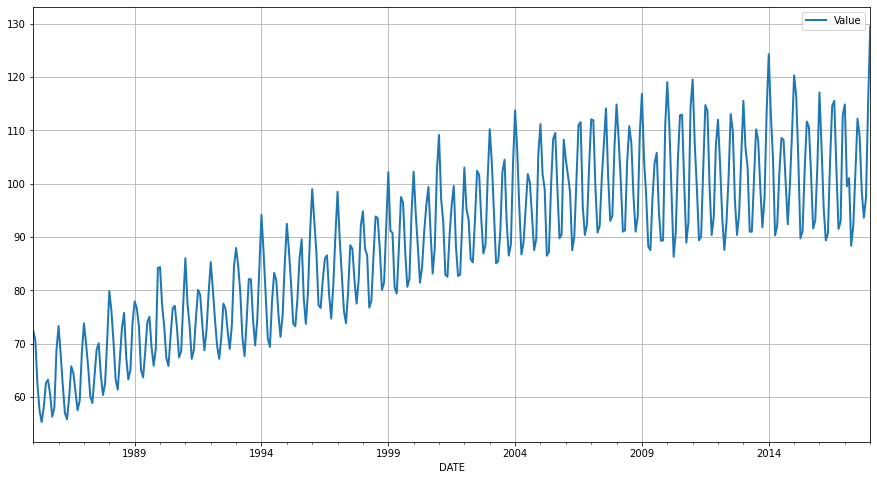

In [5]:
df.plot(figsize=(15,8), lw=2, grid=True, legend=True);

# Test For Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Value'])

In [7]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(input):
    result=adfuller(input)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [8]:
adfuller_test(df['Value'])

ADF Test Statistic : -2.256990350047245
p-value : 0.1862146911658677
#Lags Used : 15
Number of Observations Used : 381
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# 1. Differencing

In [9]:
df['Value First Difference'] = df['Value'] - df['Value'].shift(1)

In [10]:
df['Value'].shift(1)

DATE
1985-01-01         NaN
1985-02-01     72.5052
1985-03-01     70.6720
1985-04-01     62.4502
1985-05-01     57.4714
                ...   
2017-09-01    108.9312
2017-10-01     98.6154
2017-11-01     93.6137
2017-12-01     97.3359
2018-01-01    114.7212
Freq: MS, Name: Value, Length: 397, dtype: float64

In [11]:
df['Seasonal First Difference']= df['Value'] - df['Value'].shift(12)

In [12]:
df.head(14)

,Value,Value First Difference,Seasonal First Difference
DATE,,,
1985-01-01,72.5052,NaN,NaN
1985-02-01,70.6720,-1.8332,NaN
1985-03-01,62.4502,-8.2218,NaN
1985-04-01,57.4714,-4.9788,NaN
1985-05-01,55.3151,-2.1563,NaN
1985-06-01,58.0904,2.7753,NaN
1985-07-01,62.6202,4.5298,NaN
1985-08-01,63.2485,0.6283,NaN
1985-09-01,60.5846,-2.6639,NaN


# 2. ETS Decomposition

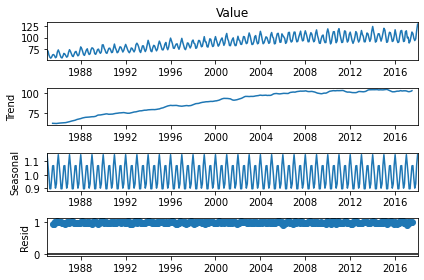

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Value'], model='mul')
result.plot();

# 3. Simple Moving Average and Exponential Moving Average

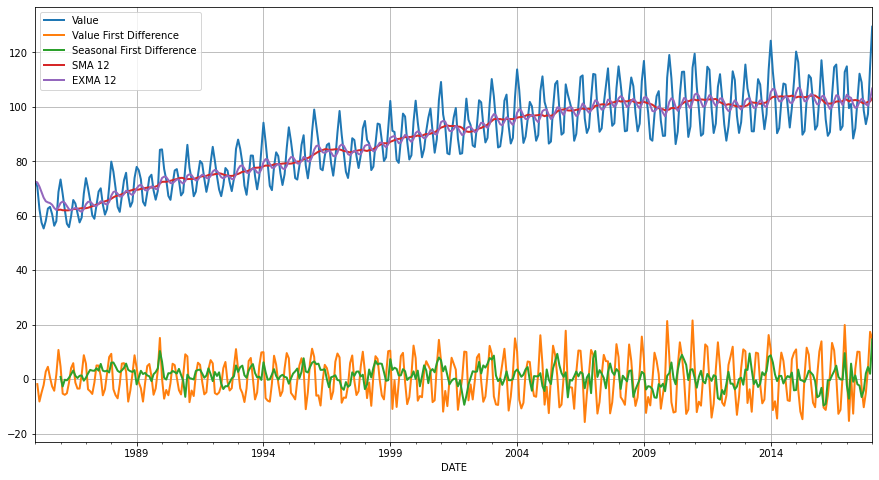

In [14]:
df['SMA 12'] = df['Value'].rolling(window=12).mean()
df['EXMA 12'] = df['Value'].ewm(span=12,adjust=False).mean()
df.plot(figsize=(15,8), lw=2, grid=True, legend=True);

# Double Exponential Smoothing - Holts Model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


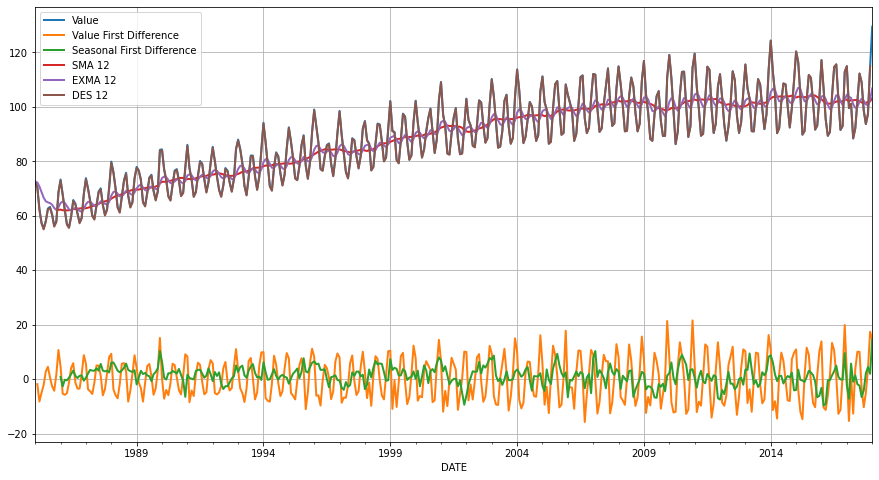

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DES 12'] = ExponentialSmoothing(df['Value'], trend='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)
df.plot(figsize=(15,8), lw=2, grid=True, legend=True);

# Triple Exponential Smoothing - Holts Winter Model - Seasonal Trend Model

In [16]:
df['TES 12'] = ExponentialSmoothing(df['Value'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head(20)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Value,Value First Difference,Seasonal First Difference,SMA 12,EXMA 12,DES 12,TES 12
DATE,,,,,,,
1985-01-01,72.5052,NaN,NaN,NaN,72.505200,72.107933,73.234031
1985-02-01,70.6720,-1.8332,NaN,NaN,72.223169,70.294534,67.465251
1985-03-01,62.4502,-8.2218,NaN,NaN,70.719636,62.111094,64.979112
1985-04-01,57.4714,-4.9788,NaN,NaN,68.681445,57.144704,56.925050
1985-05-01,55.3151,-2.1563,NaN,NaN,66.625085,54.991973,57.609318
1985-06-01,58.0904,2.7753,NaN,NaN,65.312056,57.750401,61.855557
1985-07-01,62.6202,4.5298,NaN,NaN,64.897924,62.263725,64.496730
1985-08-01,63.2485,0.6283,NaN,NaN,64.644167,62.897490,63.370839
1985-09-01,60.5846,-2.6639,NaN,NaN,64.019618,60.248550,57.388223


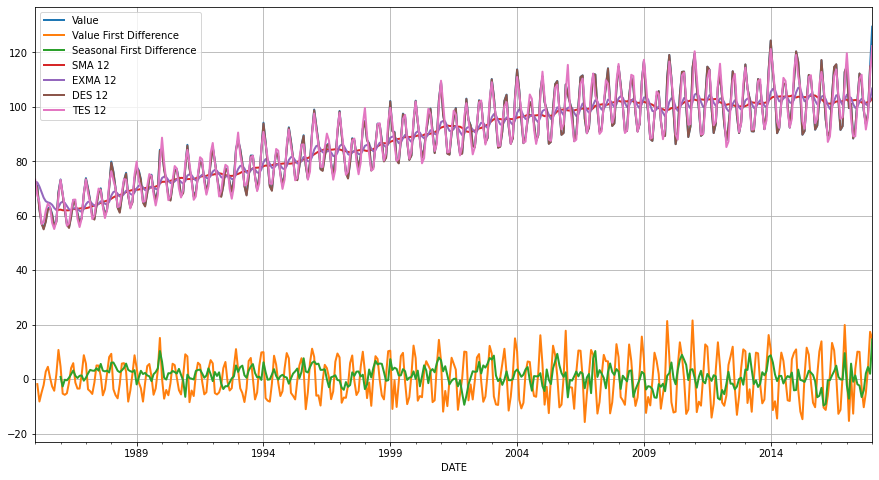

In [17]:
df.plot(figsize=(15,8), lw=2, grid=True, legend=True);

In [18]:
df.head(10)

,Value,Value First Difference,Seasonal First Difference,SMA 12,EXMA 12,DES 12,TES 12
DATE,,,,,,,
1985-01-01,72.5052,NaN,NaN,NaN,72.505200,72.107933,73.234031
1985-02-01,70.6720,-1.8332,NaN,NaN,72.223169,70.294534,67.465251
1985-03-01,62.4502,-8.2218,NaN,NaN,70.719636,62.111094,64.979112
1985-04-01,57.4714,-4.9788,NaN,NaN,68.681445,57.144704,56.925050
1985-05-01,55.3151,-2.1563,NaN,NaN,66.625085,54.991973,57.609318
1985-06-01,58.0904,2.7753,NaN,NaN,65.312056,57.750401,61.855557
1985-07-01,62.6202,4.5298,NaN,NaN,64.897924,62.263725,64.496730
1985-08-01,63.2485,0.6283,NaN,NaN,64.644167,62.897490,63.370839
1985-09-01,60.5846,-2.6639,NaN,NaN,64.019618,60.248550,57.388223


In [19]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.673482023381763
p-value : 8.812644938088861e-07
#Lags Used : 12
Number of Observations Used : 372
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


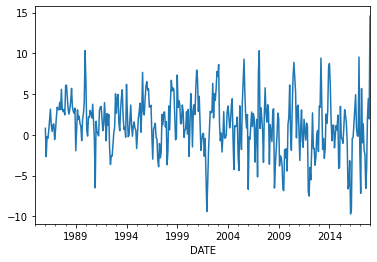

In [20]:
df['Seasonal First Difference'].plot()

# AR Model

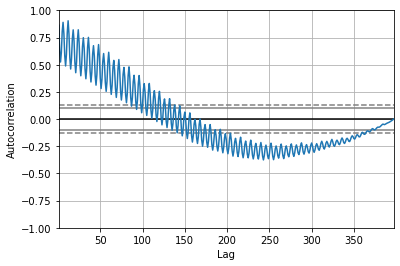

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Value'])
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [62]:
pip install --upgrade --no-deps statsmodels


Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.0)


In [65]:
pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-uiz2hzzn
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-uiz2hzzn
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.13.0.dev0+34.g2322d3597-cp36-cp36m-linux_x86_64.whl size=17714982 sha256=6abeefa9cbe81acdace5b79b0d09ffd8662770c1b3e6d2dfd761062ef64a9c8c
  Stored in directory: /tmp/pip-ephem-wheel-cache-k38uy872/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


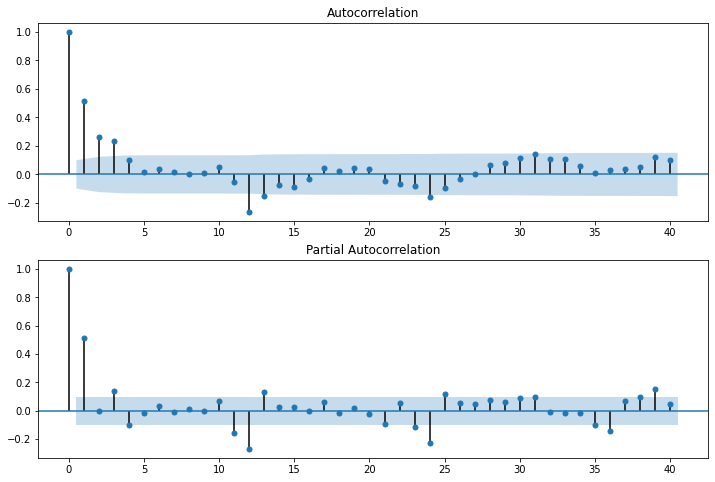

In [23]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

# ARIMA Model

In [24]:
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Value'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  396
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1327.994
Method:                       css-mle   S.D. of innovations              6.904
Date:                Fri, 25 Sep 2020   AIC                           2663.989
Time:                        21:39:23   BIC                           2679.914
Sample:                    02-01-1985   HQIC                          2670.298
                         - 01-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1108      0.020      5.607      0.000       0.072       0.149
ar.L1.D.Value     0.5414      0.045     11.919      0.000       0.452       0.630
ma.L1.D.Value    -0.9767      0.010   -102.359      0.000      -0.995      -0.958
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8469           +0.0000j            1.8469            0.0000
MA.1            1.0238           +0.0000j            1.0238            0.0000
-----------------------------------------------------------------------------
"""

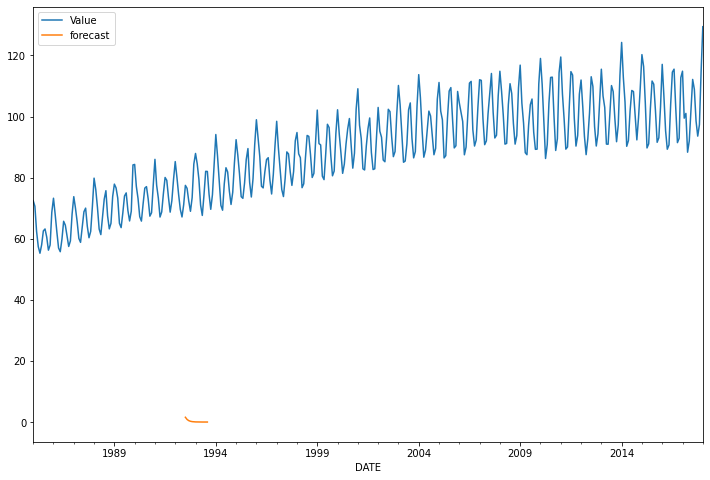

In [26]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [29]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

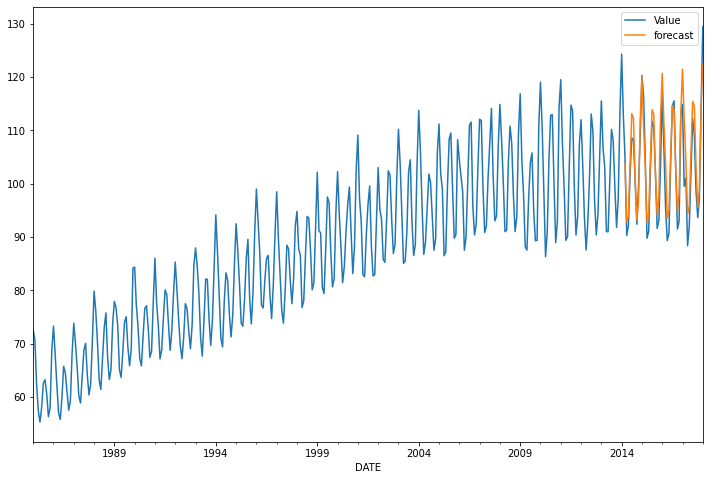

In [41]:
df['forecast']=results.predict(start=350,end=400,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [33]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [34]:
future_datest_df.tail()

,Value,Value First Difference,Seasonal First Difference,SMA 12,EXMA 12,DES 12,TES 12,forecast
2019-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
future_df=pd.concat([df,future_datest_df])

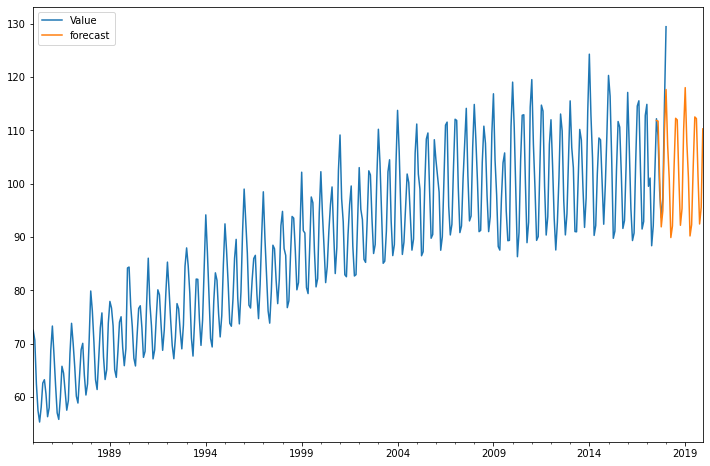

In [40]:
future_df['forecast'] = results.predict(start = 390, end = 450, dynamic= True)  
future_df[['Value', 'forecast']].plot(figsize=(12, 8))